In [117]:
!conda install xlwt -y

Solving environment: done

## Package Plan ##

  environment location: /Users/jiazhenghao/Library/jupyterlab-desktop/jlab_server

  added / updated specs:
    - xlwt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlwt-1.3.0                 |           py38_0         159 KB
    ------------------------------------------------------------
                                           Total:         159 KB

The following NEW packages will be INSTALLED:

  xlwt               pkgs/main/osx-64::xlwt-1.3.0-py38_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [118]:
!conda install -c conda-forge tqdm -y

Solving environment: done

## Package Plan ##

  environment location: /Users/jiazhenghao/Library/jupyterlab-desktop/jlab_server

  added / updated specs:
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.65.0                |     pyhd8ed1ab_1          86 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          86 KB

The following packages will be UPDATED:

  tqdm                                  4.64.1-pyhd8ed1ab_0 --> 4.65.0-pyhd8ed1ab_1 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.01.10~ --> conda-forge::ca-certificates-2022.12.7-h033912b_0 
  certifi            pkgs/main/osx-64::certifi-2022.12.7-p~ --> conda-forge/noarch::certifi-2022.12.7-pyhd8ed1ab_0 



                                             

In [116]:
!conda install openpyxl -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



## Package Plan ##

  environment location: /Users/jiazhenghao/Library/jupyterlab-desktop/jlab_server

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py38hecd8cb5_0         423 KB
    ca-certificates-2023.01.10 |       hecd8cb5_0         121 KB
    certifi-2022.12.7          |   py38hecd8cb5_0         151 KB
    conda-23.3.1               |   py38hecd8cb5_0         962 KB
    et_xmlfile-1.1.0           |   py38hecd8cb5_0          10 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
   

# Import

In [1]:
import numpy as np
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import os

In [2]:
penalty_weight = 5 # seconds

# Read time from files into dataframe

In [19]:
foo = 'filename'
exec(foo + " = [1,2,3]")
eval(foo)

[1, 2, 3]

In [3]:
conditions = []
ave_time = []
dct = {}
for file in glob.glob("time-record/*.txt"):
    with open(file, 'r') as f:
        a = f.read().split('\n')[:-1] # strip the last whitespace
        # ['36.175875663757324,1', '36.49494504928589,1']
        a = np.average([float(ele.split(',')[0]) + int(ele.split(',')[1]) * penalty_weight for ele in a])
        print(a)
        conditions.append(f.name.replace('time-record/','').replace('.txt',''))
        ave_time.append(a)
        dct[f.name.replace('time-record/','').replace('.txt','')] = a
    


150.72626900672913
75.5430599451065
41.335410356521606
0.335892915725708
0.15634000301361084
0.39758336544036865
47.21610403060913
3.4805115461349487
21.889376997947693
19.25446653366089
29.595133423805237
0.17364394664764404
9.616538047790527
0.19461464881896973
0.35843193531036377
0.309794545173645
17.113451600074768
11.786075472831726
16.349694967269897
9.725653171539307
11.791433453559875
7.9808290004730225
3.5271679162979126
0.16381406784057617


In [36]:
# Test Average
with open('time-record/classic-PbEq-percol-is_num-no_prefillsolve_time.txt', 'r') as f:
    a = f.read().split('\n')[:-1] # strip the last whitespace
    # ['36.175875663757324,1', '36.49494504928589,1']
    a = np.average([float(ele[:-2]) + int(ele[-1])*penalty_weight for ele in a])
    print(a)
    conditions.append(f.name[:-4])
    ave_time.append(a)
    print(conditions,ave_time)

0.335892915725708
['time-record/classic-PbEq-percol-is_num-no_prefillgen_time', 'time-record/classic-distinct-percol-is_num-prefillsolve_time', 'time-record/classic-PbEq-percol-is_num-no_prefillsolve_time'] [16.349694967269897, 7.9808290004730225, 0.335892915725708]


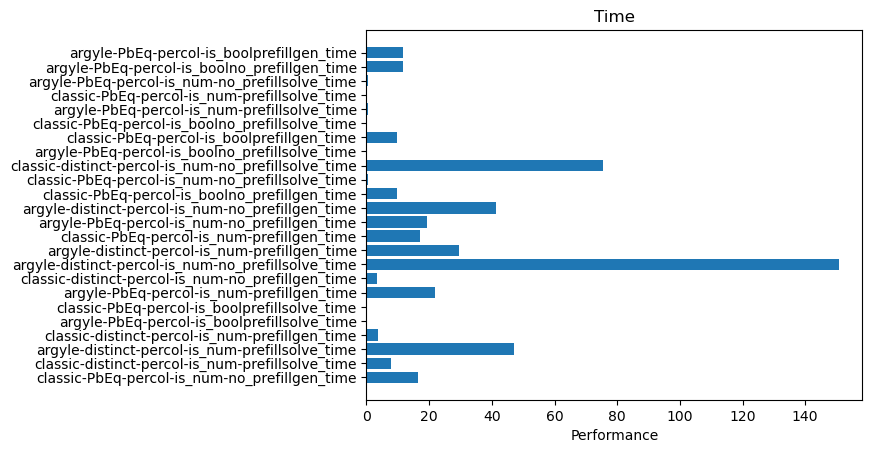

In [69]:
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(conditions))
performance = 3 + 10 * np.random.rand(len(conditions))

ax.barh(y_pos, ave_time)
ax.set_yticks(y_pos, labels=conditions)
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Time')

plt.show()

In [98]:
table = [[b1, b2, b3, b4, b5] for b1 in (True, False)
          for b2 in (True, False)
          for b3 in (True, False)
          for b4 in (True, False) if not (b2 and b4)
          for b5 in (True, False) if b3]

for ele in table:
    b1, b2, b3, b4, b5 = ele
    for suffix in ['solve_time.txt','gen_time.txt']:
        s = ['argyle-','classic-'][b1]+['PbEq-','distinct-'][b2]+['inorder-','percol-'][b3]\
                +['is_num-','is_bool-'][b4]+['no_prefill-','prefill-'][b5]+suffix
        with open('time-record/'+s) as f:
            a = f.read().split('\n')[:-1] # strip the last whitespace
            # ['36.175875663757324,1', '36.49494504928589,1']
            a = np.average([float(ele.split(',')[0]) + int(ele.split(',')[1]) * penalty_weight for ele in a])
            ele.append(a)
display(table)


[[True, True, True, False, True, 7.9808290004730225, 3.5271679162979126],
 [True, True, True, False, False, 75.5430599451065, 3.4805115461349487],
 [True, False, True, True, True, 0.16381406784057617, 9.725653171539307],
 [True, False, True, True, False, 0.15634000301361084, 9.616538047790527],
 [True, False, True, False, True, 0.309794545173645, 17.113451600074768],
 [True, False, True, False, False, 0.335892915725708, 16.349694967269897],
 [False, True, True, False, True, 47.21610403060913, 29.595133423805237],
 [False, True, True, False, False, 150.72626900672913, 41.335410356521606],
 [False, False, True, True, True, 0.19461464881896973, 11.791433453559875],
 [False, False, True, True, False, 0.17364394664764404, 11.786075472831726],
 [False, False, True, False, True, 0.35843193531036377, 21.889376997947693],
 [False, False, True, False, False, 0.39758336544036865, 19.25446653366089]]

In [103]:
df = pd.DataFrame(table,columns=['classic','distinct','per_col','no_num','prefill','solve_time','gen_time'])
print(df)

    classic  distinct  per_col  no_num  prefill  solve_time   gen_time
0      True      True     True   False     True    7.980829   3.527168
1      True      True     True   False    False   75.543060   3.480512
2      True     False     True    True     True    0.163814   9.725653
3      True     False     True    True    False    0.156340   9.616538
4      True     False     True   False     True    0.309795  17.113452
5      True     False     True   False    False    0.335893  16.349695
6     False      True     True   False     True   47.216104  29.595133
7     False      True     True   False    False  150.726269  41.335410
8     False     False     True    True     True    0.194615  11.791433
9     False     False     True    True    False    0.173644  11.786075
10    False     False     True   False     True    0.358432  21.889377
11    False     False     True   False    False    0.397583  19.254467


# Plot df grouped by different comparisons 